In [1]:
# !git clone -b master https://github.com/StefanoNasini/Country-by-country-2022-2023-international-relationships
# !cd Country-by-country-2022-2023-international-relationships

Implement and realize the formula
$$w_{ij} = (1+\frac{GDP_j}{GDP_i})^{d_{ij}}$$

(previous version features an extra coefficient for friends and enemies) where 

$d_{i,j} = 1$ if i and j are neighbors. 

$d_{i,j}=\frac{\Delta_{max}-\Delta_{i,j}}{\Delta_{max}}$ otherwise

In [2]:
import json
import os
root = os.getcwd()
root = os.path.dirname(root)
import pandas as pd

In [3]:
rho = 1

covotes = pd.read_csv(os.path.join(root, "constructed_network", "covotes.csv"), index_col=0)
friends90_tri = pd.read_csv(os.path.join(root, "constructed_network", "final_network", "friends90_tri.csv"), index_col=0)
enemies90_tri = pd.read_csv(os.path.join(root, "constructed_network", "final_network", "enemies90_tri.csv"), index_col=0)

friends80_tri = pd.read_csv(os.path.join(root, "constructed_network", "final_network", "friends80_tri.csv"), index_col=0)
enemies80_tri = pd.read_csv(os.path.join(root, "constructed_network", "final_network", "enemies80_tri.csv"), index_col=0)
dij = pd.read_csv(os.path.join(root, "constructed_network", "distance_factor.csv"), index_col = 0)
UN_countries = friends90_tri.columns

In [4]:
wij = pd.DataFrame(columns=sorted(UN_countries), index=sorted(UN_countries))

In [5]:
with open(os.path.join(root, "raw_data", "GDP_data", "GDP_data.json"), 'r') as f:
    GDP = eval(f.read())

In [6]:
os.chdir(os.path.join(root, "src", "utils"))
from aka import tri2aka
os.chdir(os.path.join(root, "src"))

['Y AFGHANISTAN\n', 'A ALBANIA\n', 'Y ALGERIA\n', 'A ANDORRA\n', 'Y ANGOLA\n', 'Y ANTIGUA AND BARBUDA\n', 'Y ARGENTINA\n', 'A ARMENIA\n', 'N AUSTRALIA\n', 'N AUSTRIA\n']


In [7]:
# make sure every country in the UN have their GDP data


for c in covotes.columns:
    if c not in GDP.keys():
        print(c)
        print(tri2aka[c])

In [8]:
for tri1 in UN_countries:
    for tri2 in UN_countries:
        wij.loc[tri1, tri2] = (1+GDP[tri2]/GDP[tri1])**(dij.loc[tri1, tri2])
#         if enemies90_tri.loc[tri1, tri2] == True:
#             wij.loc[tri1, tri2] *= rho

In [9]:
# no missing values
wij.isna().sum().sum()

0

In [10]:
with open(os.path.join(root, 'constructed_network', 'w_data_real_double.txt'), 'w') as f:
    for i in range(len(UN_countries)):
        for j in range(len(UN_countries)):
            f.write(str((wij.iloc[i, j])))
            f.write(' ')
        f.write('\n')

In [11]:
# wij /= wij.min().min()

In [12]:
wij.to_csv(os.path.join(root, "constructed_network", "final_network", "weighted.csv"))

In [13]:
# truncate to unity
wij_unit = pd.DataFrame(index=UN_countries, columns=UN_countries, dtype=int)

In [14]:
for i in range(len(UN_countries)):
    for j in range(len(UN_countries)):
        wij_unit.iloc[i, j] = int(wij.iloc[i, j]+0.5)

In [15]:
with open(os.path.join(root, 'constructed_network', 'w_data_real.txt'), 'w') as f:
    for i in range(len(UN_countries)):
        for j in range(len(UN_countries)):
            f.write(str((wij_unit.iloc[i, j])))
            f.write(' ')
        f.write('\n')

In [16]:
# for 90 percent

import matplotlib.pyplot as plt
l = []
out_degree = [0]*len(UN_countries)
in_degree = [0]*len(UN_countries)
for i in range(len(UN_countries)):
    for j in range(len(UN_countries)):
        if friends90_tri.iloc[i, j] == True or enemies90_tri.iloc[i, j] == True:
            l.append(wij_unit.iloc[i, j])
            out_degree[i] += 1
            
        if friends90_tri.iloc[j, i] == True or enemies90_tri.iloc[j, i] == True:
            in_degree[i] += 1
            
l = []
w_out_degree = [0]*len(UN_countries)
w_in_degree = [0]*len(UN_countries)
for i in range(len(UN_countries)):
    for j in range(len(UN_countries)):
        if friends90_tri.iloc[i, j] == True or enemies90_tri.iloc[i, j] == True:
            l.append(wij_unit.iloc[i, j])
            w_out_degree[i] += wij.iloc[i, j]
            
        if friends90_tri.iloc[j, i] == True or enemies90_tri.iloc[j, i] == True:
            w_in_degree[i] += wij.iloc[i, j]
            
from math import log10
for i in range(len(UN_countries)):
    w_in_degree[i] = log10(1+w_in_degree[i])
    w_out_degree[i] = log10(1+w_out_degree[i])


In [18]:
os.chdir(os.path.join(root, 'constructed_network', 'graph'))
if 'histograms' not in os.listdir():
    os.mkdir("histograms")
os.chdir(root)

plt.hist(in_degree, bins=20, color='grey')
plt.ylim(0, 90)
plt.xlim(0, 190)
plt.savefig(os.path.join(root, 'constructed_network', 'graph', 'histograms', 'in_degree90.pdf'), format="pdf")
plt.close()

plt.hist(out_degree, bins=20, color='grey')
plt.ylim(0, 90)
plt.xlim(0, 190)
plt.savefig(os.path.join(root, 'constructed_network', 'graph', 'histograms', 'out_degree90.pdf'), format="pdf")
plt.close()

import numpy as np

plt.hist(w_in_degree, bins=np.linspace(0, 4.5, 20), color='grey')
plt.ylim(0, 45)
plt.xlim(0, 4.5)
plt.savefig(os.path.join(root, 'constructed_network', 'graph', 'histograms', 'weighted_in_degree90.pdf'), format="pdf")
plt.close()

plt.hist(w_out_degree, bins=np.linspace(0, 4.5, 20), color='grey')
plt.ylim(0, 45)
plt.xlim(0, 4.5)
plt.savefig(os.path.join(root, 'constructed_network', 'graph', 'histograms', 'weighted_out_degree90.pdf'), format="pdf")
plt.close()

In [19]:
# for 80 percent

import matplotlib.pyplot as plt
l = []
out_degree = [0]*len(UN_countries)
in_degree = [0]*len(UN_countries)
for i in range(len(UN_countries)):
    for j in range(len(UN_countries)):
        if friends80_tri.iloc[i, j] == True or enemies80_tri.iloc[i, j] == True:
            l.append(wij_unit.iloc[i, j])
            out_degree[i] += 1
            
        if friends80_tri.iloc[j, i] == True or enemies80_tri.iloc[j, i] == True:
            in_degree[i] += 1
            
        
l = []
w_out_degree = [0]*len(UN_countries)
w_in_degree = [0]*len(UN_countries)
for i in range(len(UN_countries)):
    for j in range(len(UN_countries)):
        if friends80_tri.iloc[i, j] == True or enemies80_tri.iloc[i, j] == True:
            l.append(wij_unit.iloc[i, j])
            w_out_degree[i] += wij.iloc[i, j]
            
        if friends80_tri.iloc[j, i] == True or enemies80_tri.iloc[j, i] == True:
            w_in_degree[i] += wij.iloc[i, j]
            
from math import log10
for i in range(len(UN_countries)):
    w_in_degree[i] = log10(1+w_in_degree[i])
    w_out_degree[i] = log10(1+w_out_degree[i])


In [20]:
plt.hist(in_degree, bins=20, color='grey')
plt.ylim(0, 90)
plt.xlim(0, 190)
plt.savefig(os.path.join(root, 'constructed_network', 'graph', 'histograms', 'in_degree80.pdf'), format="pdf")
plt.close()

plt.hist(out_degree, bins=20, color='grey')
plt.ylim(0, 90)
plt.xlim(0, 190)
plt.savefig(os.path.join(root, 'constructed_network', 'graph', 'histograms', 'out_degree80.pdf'), format="pdf")
plt.close()


plt.hist(w_in_degree, bins=np.linspace(0, 4.5, 20), color='grey')
plt.ylim(0, 45)
plt.xlim(0, 4.5)
plt.savefig(os.path.join(root, 'constructed_network', 'graph', 'histograms', 'weighted_in_degree80.pdf'), format="pdf")
plt.close()

plt.hist(w_out_degree, bins=np.linspace(0, 4.5, 20), color='grey')
plt.ylim(0, 45)
plt.xlim(0, 4.5)
plt.savefig(os.path.join(root, 'constructed_network', 'graph', 'histograms', 'weighted_out_degree80.pdf'), format="pdf")
plt.close()

In [21]:
w_in_degree

[2.2393583737443437,
 1.9260907705282142,
 3.0838010640268214,
 2.1727182798148994,
 1.5945949274970628,
 2.2994071602201225,
 2.735323766246964,
 1.88074019510584,
 2.127904879492915,
 0.9602623504770255,
 3.5068073502230215,
 2.1589086512407207,
 2.669520325607308,
 2.6121988069280957,
 1.9092767812283251,
 2.603064397697426,
 2.1313212263864103,
 0.738560208143395,
 2.5396563711806928,
 2.645987695189842,
 2.580621935127224,
 1.7658854569479938,
 1.7905659605715103,
 2.5754274570402376,
 2.28163567634993,
 4.159078869012582,
 2.253640179007308,
 3.563196891734142,
 2.189270622687979,
 1.8939032021155209,
 1.4444231098459426,
 1.6495278717062571,
 0.8507904789012669,
 2.040655074247793,
 1.6852399559400553,
 2.129389069830951,
 1.8347646860167,
 3.859314607494194,
 3.3218406837336505,
 1.638366707030136,
 1.0886994293671106,
 2.860870641295773,
 2.3982188707108136,
 1.9334234635186232,
 3.157924820406734,
 2.411757007705534,
 2.2607219832016634,
 1.3387797568223851,
 1.20181097564677

(array([17., 20., 22., 16., 16., 15., 14., 19.,  9., 10.,  2.,  3.,  2.,
         4.,  1.,  3.,  1.,  2.,  5.,  3.]),
 array([  0.,   9.,  18.,  27.,  36.,  45.,  54.,  63.,  72.,  81.,  90.,
         99., 108., 117., 126., 135., 144., 153., 162., 171., 180.]),
 <BarContainer object of 20 artists>)

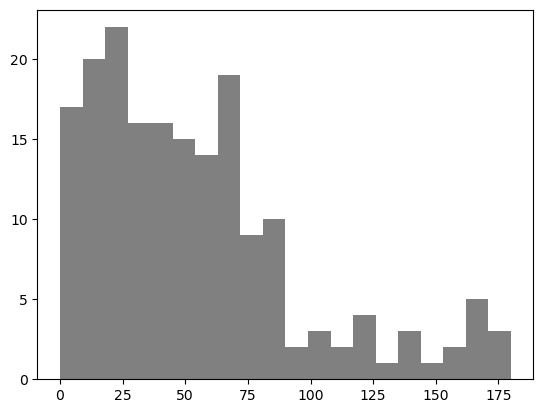

In [22]:
# histogram for in-degree
plt.hist(in_degree, bins=20, color='grey')
# plt.title("The histogram of in-degrees for all country")

(array([ 4., 10., 14., 31., 19., 15., 12., 15.,  8.,  9.,  5., 12.,  2.,
         5.,  2.,  5.,  7.,  2.,  2.,  5.]),
 array([ 21.  ,  25.55,  30.1 ,  34.65,  39.2 ,  43.75,  48.3 ,  52.85,
         57.4 ,  61.95,  66.5 ,  71.05,  75.6 ,  80.15,  84.7 ,  89.25,
         93.8 ,  98.35, 102.9 , 107.45, 112.  ]),
 <BarContainer object of 20 artists>)

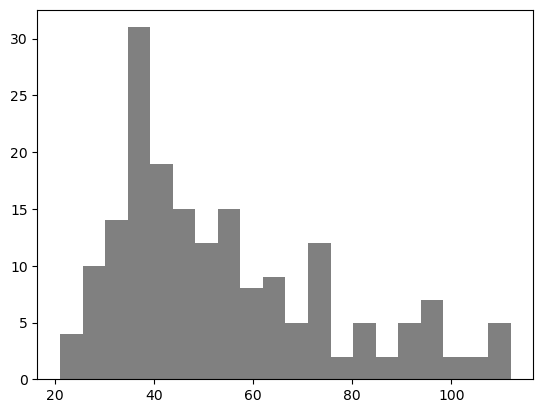

In [23]:
# histogram for out-degree
plt.hist(out_degree, bins=20, color='grey')
# plt.title("The histogram of out-degrees for all country")